# Self-Driving Car Engineer Nanodegree

# Project: CarND Capstone - Build a Traffic Light Classifier

In [1]:
#1
import cv2
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.contrib.layers import flatten
from collections import Counter
from sklearn.utils import shuffle


In [39]:
#2 
# GPU Test
# Uncomment to test for GPU

# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Runs the op.
print(sess.run(c))

print()


[[ 22.  28.]
 [ 49.  64.]]



# Load All Images

In [64]:
#3
# Load all images

# Generate path to image folders
#p = 'C:\Users\root\CarND-Capstone-Classifier\CarND-Traffic_Light\tl-data\171009\'
p0 = '/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Light/tl-data/'
p1 = '171009/'
p1 = '171010/'
p1 = '171011-Consolidated/'

path = []
for i in range(4):
  path.append(p0 + p1 + str(i) + '/')

print(path)

# Preprocess image
def preProcess1(image):
        # Resize from 600x800 to 600x600
        #image = cv2.resize(image, (0, 0), fx=0.75, fy=1.00, interpolation = cv2.INTER_AREA)
        image = cv2.resize(image, (0, 0), fx=0.75, fy=1.00, interpolation = cv2.INTER_AREA)
        
        # Convert from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
        
        return image

# Read images
def getData(i):
    X = []
    Y = []
    for img_file in glob.glob(os.path.join(path[i], '*.jpg')):
        image = cv2.imread(img_file)
        image = preProcess1(image)        
        X.append(image)
        Y.append(i)
        
        image= cv2.flip(image,1)
        X.append(image)
        Y.append(i)
        
    return X, Y

Xr, Yr = getData(0)
Xy, Yy = getData(1)
Xg, Yg = getData(2)
Xn, Yn = getData(3)


['/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Light/tl-data/171011-Consolidated/0/', '/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Light/tl-data/171011-Consolidated/1/', '/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Light/tl-data/171011-Consolidated/2/', '/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Light/tl-data/171011-Consolidated/3/']


In [65]:

print()
print("Red lights:",len(Xr))
print("Yellow lights:",len(Xy))
print("Green lights",len(Xg))
print("No traffic lights:",len(Xn))




Red lights: 592
Yellow lights: 28
Green lights 238
No traffic lights: 544


# Display Samle Images from Dataset

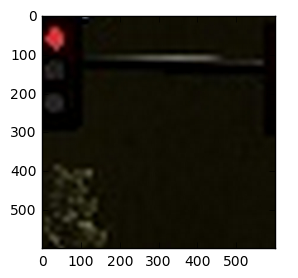

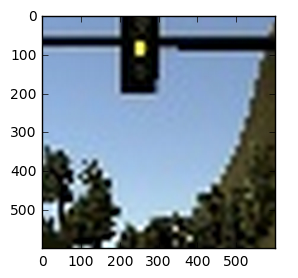

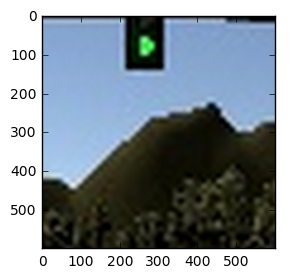

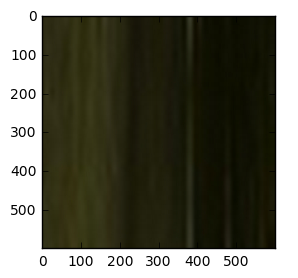

In [66]:
# 4

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(Xr[0])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(Xy[0])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(Xg[0])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(Xn[0])
plt.show()



# Split and Build Data Sets

In [69]:

def sampleData(c, i, j, Xr, Yr):
    if c == 0:
        X = Xr
        Y = Yr
    elif c == 1:
        X = Xy
        Y = Yy
    elif c == 2:
        X = Xg
        Y = Yg
    elif c == 3:
        X = Xn
        Y = Yn

    X = X[i:j]
    Y = Y[i:j]
    return X, Y

def buildDataSet(i, j, Xr, Xy, Xg, Xn, Yr, Yy, Yg, Yn):
    X = []
    Y = []
    
    Xrs, Yrs = sampleData(0, i, j, Xr, Yr)
    X.extend(Xrs)
    Y.extend(Yrs)
    
    Xys, Yys = sampleData(1, 0, 28, Xy, Yy)
    X.extend(Xys)
    Y.extend(Yys)
    
    Xgs, Ygs = sampleData(2, i, j, Xg, Yg)
    X.extend(Xgs)
    Y.extend(Ygs)
    
    Xns, Yns = sampleData(3, i, j, Xn, Yn)
    X.extend(Xns)
    Y.extend(Yns)
    
    return X, Y

i = 1
j = 50
X_train, Y_train = buildDataSet(i, j, Xr, Xy, Xg, Xn, Yr, Yy, Yg, Yn)

i = 51
j = 100
X_test, Y_test = buildDataSet(i, j, Xr, Xy, Xg, Xn, Yr, Yy, Yg, Yn)

i = 101
j = 150
X_valid, Y_valid = buildDataSet(i, j, Xr, Xy, Xg, Xn, Yr, Yy, Yg, Yn)




175 175
175 175
175 175

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


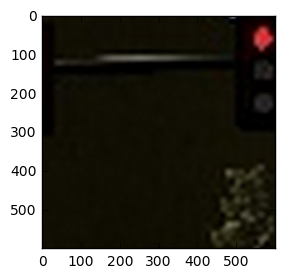

In [70]:
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))
print(len(X_valid), len(Y_valid))
print()
print(Y_valid)

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
plt.show()

# Pre-process the Data Set (normalization, grayscale, etc.)

In [71]:
#5
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

def preProcess2(X, Y):
    #Convert to numpy array  (X = numpy.zeros(shape=(600,800,3)))
    X = np.asarray(X)
    
    #Grayscale conversion
    #No greyscaling

    #Scale features to be in [0, 1]
    X = ((X - 128.0)/ 128.0)

    # Shuffle images (Can be replaced with numpy shuffle)
    X, Y = shuffle(X, Y, random_state=0)

    return X, Y

X_train, Y_train = preProcess2(X_train, Y_train)
X_test, Y_test = preProcess2(X_test, Y_test)
X_valid, Y_valid = preProcess2(X_valid, Y_valid)

print(Y_train)
print()
print(Y_test)
print()
print(Y_valid)




[1, 3, 1, 1, 2, 2, 0, 3, 3, 2, 3, 3, 0, 2, 3, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 3, 2, 3, 0, 1, 3, 0, 0, 0, 2, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 1, 3, 0, 2, 2, 0, 3, 0, 2, 3, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 0, 2, 0, 3, 0, 3, 0, 0, 2, 1, 2, 1, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 2, 2, 0, 1, 0, 3, 1, 0, 2, 3, 0, 2, 3, 0, 0, 3, 1, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 2, 2, 2, 3, 3, 1, 2, 0, 2, 3, 3, 0, 1, 3, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 3]

[1, 3, 1, 1, 2, 2, 0, 3, 3, 2, 3, 3, 0, 2, 3, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 3, 2, 3, 0, 1, 3, 0, 0, 0, 2, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 1, 3, 0, 2, 2, 0, 3, 0, 2, 3, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 0, 2, 0, 3, 0, 3, 0, 0, 2, 1, 2, 1, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 2, 2, 0, 1, 0, 3, 1, 0, 2, 3, 0, 2, 3, 0, 0, 3, 1, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 2, 2, 2, 3, 3, 1, 2, 0

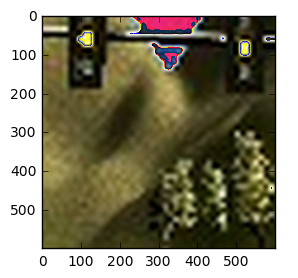

In [72]:
# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X_train[3])
plt.show()


# Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [73]:
#7

# Basic summary dat
### Training set, test set and cross validation set

# What's the shape of an traffic light image?
image_shape = X_train[0].shape

#Training set, test set and validation set
n_train = len(X_train)
n_test = len(X_test)
n_valid = len(X_valid)

#Unique labels
n_train_classes = len(set(Y_train))
n_test_classes = len(set(Y_test))
n_valid_classes = len(set(Y_valid))

#Sample percentages
n_total = n_train + n_test + n_valid 
pn_train = n_train *100.0/n_total 
pn_test = n_test * 100.0/n_total 
pn_valid = n_valid *100.0/n_total 

print("Image data shape =", image_shape)
print()
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of cross validation examples =", n_valid)
print("Total number of examples =", n_total)
print()

print("Percentage of training examples  =", pn_train)
print("Percentage of test examples  =", pn_test)
print("Percentage of cross validation examples  =", pn_valid)

print()
print("Distribution of classes in training set =", Counter(Y_train).most_common(4))

#A count of the # images in each class for each dataset

#group_by_id = Counter(Y_train)

print()
print('Number of traffic signs in the training set for each ClassId in descending order...')
#print(group_by_id.most_common())
print(print(Counter(Y_train).most_common(4)))
print()
print('Number of traffic signs in the test set for each ClassId in descending order...')
#print(group_by_id.most_common())
print(print(Counter(Y_test).most_common(4)))
print()
print('Number of traffic signs in the validation set for each ClassId in descending order...')
#print(group_by_id.most_common())
print(print(Counter(Y_valid).most_common(4)))
print()



Image data shape = (600, 600, 3)

Number of training examples = 175
Number of testing examples = 175
Number of cross validation examples = 175
Total number of examples = 525

Percentage of training examples  = 33.333333333333336
Percentage of test examples  = 33.333333333333336
Percentage of cross validation examples  = 33.333333333333336

Distribution of classes in training set = [(0, 49), (2, 49), (3, 49), (1, 28)]

Number of traffic signs in the training set for each ClassId in descending order...
[(0, 49), (2, 49), (3, 49), (1, 28)]
None

Number of traffic signs in the test set for each ClassId in descending order...
[(0, 49), (2, 49), (3, 49), (1, 28)]
None

Number of traffic signs in the validation set for each ClassId in descending order...
[(0, 49), (2, 49), (3, 49), (1, 28)]
None



# Model Architecture

In [74]:
#8
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    logits =  0
    
    # Layer 1: Layer 1: Convolutional. Input = 600x600x3. Output = 300x300x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(10, 10, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 2, 2, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 300x300x6. Output = 150x150x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # ***********************************************************************
    
    # Layer 2: Convolutional. Input = 150x150x3 Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 2, 2, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = ?. Output = 32x32x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # ***********************************************************************
    
    # Flatten. Input = ???. Output = ???.
    fc0   = flatten(conv2)
    
    
     # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(20736, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 64), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(64))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(64, 4), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(4))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


# Train, Validate and Test the Model

In [75]:
#9
## 

# Training Parameters
EPOCHS = 10
BATCH_SIZE = 64

#Features and labels for TensorFlow
x = tf.placeholder(tf.float32, (None, 600, 600, 3))
y = tf.placeholder(tf.int32, (None))

#One hot encoding of labels
one_hot_y = tf.one_hot(y, 4)


In [76]:
#10
# Training pipeline

# Learning rate
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [77]:
#11
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [78]:
#12
### Train model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
                
    saver.save(sess, './lenet')
    print("Model saved")



Training...

EPOCH 1 ...
Validation Accuracy = 0.183

EPOCH 2 ...
Validation Accuracy = 0.229

EPOCH 3 ...
Validation Accuracy = 0.303

EPOCH 4 ...
Validation Accuracy = 0.360

EPOCH 5 ...
Validation Accuracy = 0.320

EPOCH 6 ...
Validation Accuracy = 0.314

EPOCH 7 ...
Validation Accuracy = 0.349

EPOCH 8 ...
Validation Accuracy = 0.326

EPOCH 9 ...
Validation Accuracy = 0.360

EPOCH 10 ...
Validation Accuracy = 0.406

Model saved


In [35]:
#14
# Test accuracy - Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.625


In [36]:
#15
# Train accuracy - Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(X_train, Y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Train Accuracy = 1.000
